## Arbitrary value imputation for categorical variables

This is the most widely used method of missing data imputation for categorical variables. This method consists of treating missing data as an additional category of the variable. For example, all the missing observations are grouped under the newly created label, "Missing'.

This is, in essence, the equivalent of replacing numerical variables with an arbitrary value.

The beauty of this technique resides in the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data points is high.

### Advantages

- Fast way of obtaining complete datasets

- Can be integrated into production (during model deployment)

- Highlights missing data

- No assumption made on the data

### Limitations

- If the number of NA is small, creating an additional category may introduce noise

For categorical variables, this is the method of choice, as it treats missing values as a separate category, without making any assumptions about the variable or the reasons why data could be missing. It is widely used in data science competitions and organisations. See, for example, the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

## In this demo:

We will use the House Prices dataset to demonstrate how to do mode imputation in categorical variables.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

### House Prices dataset

In [2]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

When replacing NA in categorical variables with a label called 'Missing', we are not learning anything from the training set, so in principle, we could do this in the original dataset and then separate it into train and test. However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

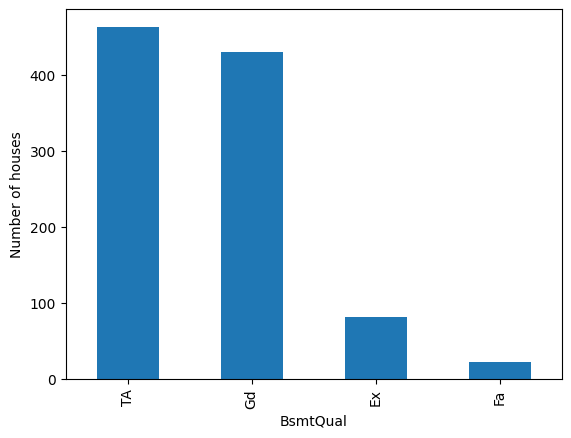

In [6]:
# let's inspect the number of observations per category in BsmtQual

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [7]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

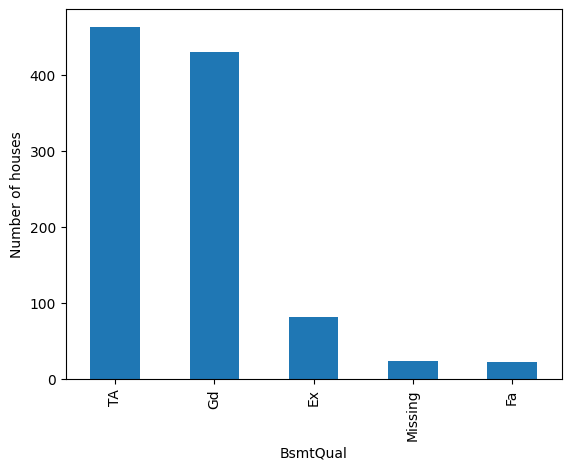

In [8]:
# let's plot the number of houses per category in the imputed variable

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

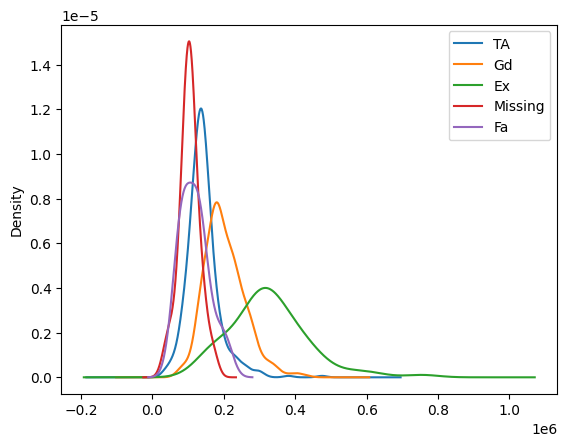

In [10]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of prices. For example, the houses with the label "Ex" tend to be the most expensive, whereas the houses that show "Missing" or "Fa" are the cheapest.

#### FirePlaceQu

In [11]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

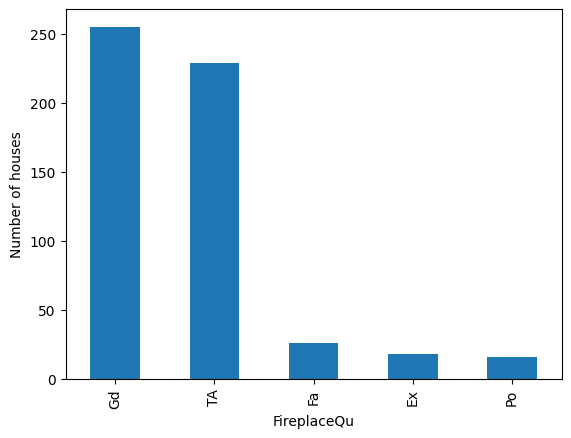

In [12]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [13]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

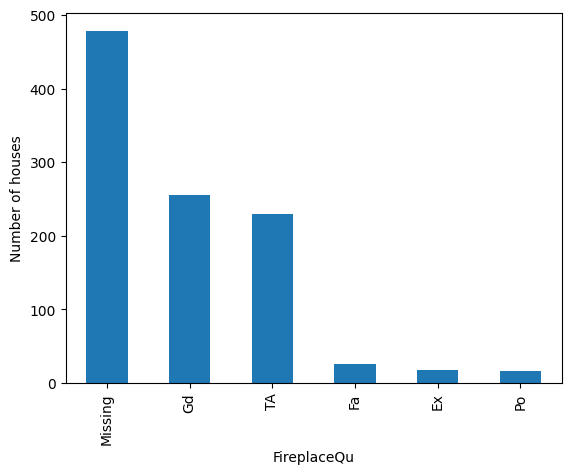

In [14]:
# let's inspect the number of observations per category
# in the imputed variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

This label contains most of the houses, as most showed missing data originally.

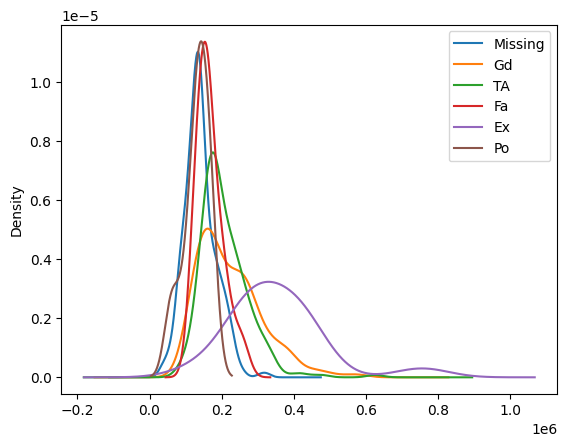

In [15]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)


# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

We observe again that the houses with different labels for FirePlaceQu also show different distributions of sale price, with those showing Ex being the most expensive ones and those showing Missing, or Fa, being the cheapest ones.

**That is all for this demonstration. In later notebooks, I will show you how to automate this with Scikit=learn and Feature-engine**

In [16]:
# BONUS: in case you need the plot for your analysis:
# here is a way of making it more general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

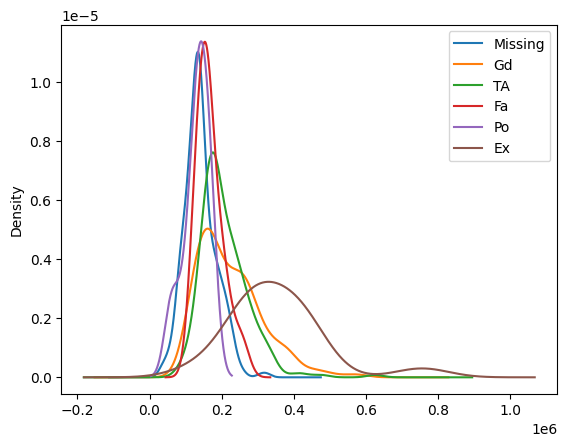

In [17]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

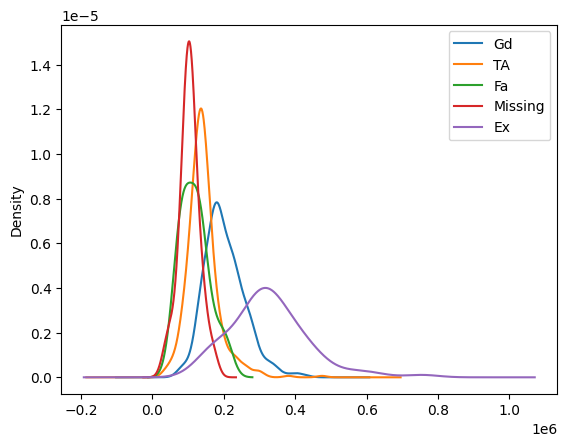

In [18]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')